BABY SHACK

In [1]:
import pandas as pd
import re


In [2]:
df = pd.read_csv('/Users/davidlafuentemartin/IRONHACK/git/data-labs/module-1/pandas-project/your-code/CSV_source/GSAF5.csv',encoding = "latin1")
df2 = df
df.head(10)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


In [3]:
#counting the total rows at the start
limits = df.shape
lines_start = limits[0]
print("Lines at start:",lines_start)

#counting the nulls for every columms
print(df.isnull().sum())
#colummns "Unnamed: 22" and "Unnamed: 23" has almost the total number of row with null, so I will directly delete
df.drop(columns=['Unnamed: 22','Unnamed: 23'],inplace=True)



Lines at start: 5992
Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64


In [4]:
#Rename in a better way the columns names
#Print of list_columns show that there are spaces in some names, others 
#are separated names or has '.'. After repair names, we put again into 
#df.columns
#df=df.rename(columns = {'Case Number':'CaseNumber'}) #one by one

list_columns = df.columns
list_columns = ['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator/Source', 'pdf', 'href_formula', 'href',
       'CaseNumber1', 'CaseNumber2', 'original_order']

print(list_columns)
df.columns = list_columns

['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Investigator/Source', 'pdf', 'href_formula', 'href', 'CaseNumber1', 'CaseNumber2', 'original_order']


In [5]:
#"href formula" and "href" seem to be equal, lets compare
difference_pdf = df['href_formula'] != df['href']
#print(difference_pdf)
df_difference_pdf = df[difference_pdf]
print("Number of differences: ",len(df_difference_pdf))
df_difference_pdf[['href_formula','href']].head(10)

#there is no better row in here, there are differences and not address in
#both columns, so I will not erase any of them

Number of differences:  54


,href_formula,href
20,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
27,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
61,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
107,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
114,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
134,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
180,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
193,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN
232,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
262,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [6]:
#Comparation of CaseNumber, CaseNumber1 and CaseNumber2
difference_casenumber = df['CaseNumber1'] != df['CaseNumber2']
df_difference_casenumber = df[difference_casenumber]
print("Number of differences: ",len(df_difference_casenumber))
print(df_difference_casenumber[['CaseNumber1','CaseNumber2']])
#there is 11 difference

#compare CaseNumber with CaseNumber1
#"href formula" and "href" seem to be equal, lets compare
difference_casenumber = df['CaseNumber'] != df['CaseNumber1']
df_difference_casenumber = df[difference_casenumber]
print("Number of differences: ",len(df_difference_casenumber))
print(df_difference_casenumber[['CaseNumber','CaseNumber1']])

#Between CaseNumber and CaseNumber1 there are 13 differences. At firts 
#glance I see CaseNumber2 is similar to CaseNumber, so a will keep 
#CaseNumber2
del df['CaseNumber']
del df['CaseNumber1']
df=df.rename(columns = {'CaseNumber2':'CaseNumber'}) 
df.head(10)

Number of differences:  11
       CaseNumber1   CaseNumber2
4       2016.09.16    2016.09.15
33    2016.07.14.R  2016.07.14.4
97    2015.01.24.b  2016.01.24.b
116     2015.11.07    2015.12.23
121     2015.10.28  2015.10.28.a
3296    1967/07.05    1967.07.05
3569  1962.08.30.b  1962,08.30.b
3654  1961.09,06.R  1961.09.02.R
4177    1952.08.04    1952.08.05
5043  1919.00.00.R  1900.00.00.R
5150  1911.07.31.T  1911.07.31.R
Number of differences:  13
        CaseNumber   CaseNumber1
4       2016.09.15    2016.09.16
33    2016.07.14.4  2016.07.14.R
97    2016.01.24.b  2015.01.24.b
116     2015.12.23    2015.11.07
121   2015.10.28.a    2015.10.28
169     2015.07-10    2015.07.10
3296    1967.07.05    1967/07.05
3569  1962,08.30.b  1962.08.30.b
3654  1961.09.02.R  1961.09,06.R
4177    1952.08.05    1952.08.04
4719  1934.01.08.R  1934.02.08.R
5043  1900.00.00.R  1919.00.00.R
5150  1911.07.31.R  1911.07.31.T


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator/Source,pdf,href_formula,href,CaseNumber,original_order
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989
5,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,5988
6,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,5987
7,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,5986
8,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,5985
9,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,5984


In [7]:
#As column date it is a bit dirty, I will use NumberCase and delete Date,
#them I will rename NumberCase to Date.
#Also I will with regular expressions fix this new Date column since there
#are mistakes

del df['Date'] #I delete this column because of the format

#CaseNumber has better format to work with
df=df.rename(columns = {'CaseNumber':'Date'}) 
df.head(10)



,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator/Source,pdf,href_formula,href,Date,original_order
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989
5,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,5988
6,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,5987
7,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,5986
8,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,5985
9,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,5984


In [8]:
#Mending the order of columns and names
list_columns = df.columns
list_columns = ['Year', 'Date', 'Country', 'Area', 'Location', 'Sex', 'Age', 'Type', 'Activity', 'Fatal', 'Injury', 'Species', 'Name', 'Time', 'Investigator/Source', 'pdf', 'href_formula', 'href','original_order']
df = df[list_columns]
df=df.rename(columns = {'Sex':'Gender'}) 
df.head(10)

,Year,Date,Country,Area,Location,Gender,Age,Type,Activity,Fatal,Injury,Species,Name,Time,Investigator/Source,pdf,href_formula,href,original_order
0,2016,2016.09.18.c,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Unprovoked,Surfing,N,Minor injury to thigh,NaN,male,13h00,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016,2016.09.18.b,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Unprovoked,Surfing,N,Lacerations to hands,NaN,Chucky Luciano,11h00,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016,2016.09.18.a,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Unprovoked,Surfing,N,Lacerations to lower leg,NaN,male,10h43,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016,2016.09.17,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Unprovoked,Surfing,N,Struck by fin on chest & leg,NaN,Rory Angiolella,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016,2016.09.15,AUSTRALIA,Victoria,Bells Beach,M,NaN,Unprovoked,Surfing,N,No injury: Knocked off board by shark,2 m shark,male,NaN,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989
5,2016,2016.09.15.R,AUSTRALIA,Western Australia,Bunbury,NaN,NaN,Boat,Fishing,N,Shark rammed boat. No injury to occupant,NaN,Occupant: Ben Stratton,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5988
6,2016,2016.09.11,USA,Florida,"Ponte Vedra, St. Johns County",M,60s,Unprovoked,Wading,N,Minor injury to arm,3' to 4' shark,male,15h15,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5987
7,2016,2016.09.07,USA,Hawaii,"Makaha, Oahu",F,51,Unprovoked,Swimming,N,Severe lacerations to shoulder & forearm,"Tiger shark, 10?",female,14h30,"Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5986
8,2016,2016.09.06,NEW CALEDONIA,North Province,Koumac,M,50,Unprovoked,Kite surfing,Y,FATAL,NaN,David Jewell,15h40,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5985
9,2016,2016.09.05.b,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",F,12,Unprovoked,Boogie boarding,N,Lacerations & punctures to lower right leg,NaN,Rylie Williams,Late afternoon,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5984


In [9]:
#Eliminating any possible space at the begining and at the end of all the words

#Choosing columns
list_columns = ['Year', 'Date', 'Country', 'Area', 'Location', 'Gender', 'Age', 'Type', 'Activity', 'Fatal', 'Injury', 'Species', 'Name','Investigator/Source', 'pdf', 'href_formula', 'href', 'original_order']

#Eliminate blank spaces for each column
for column in list_columns:
    try:
        df[column] = df[column].str.strip()
    except: #if the value is not string it will give a error but program don't crashes
        print("Column: ",column,"is not string")

df.head(10)



Column:  Year is not string
Column:  original_order is not string


,Year,Date,Country,Area,Location,Gender,Age,Type,Activity,Fatal,Injury,Species,Name,Time,Investigator/Source,pdf,href_formula,href,original_order
0,2016,2016.09.18.c,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Unprovoked,Surfing,N,Minor injury to thigh,NaN,male,13h00,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016,2016.09.18.b,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Unprovoked,Surfing,N,Lacerations to hands,NaN,Chucky Luciano,11h00,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016,2016.09.18.a,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Unprovoked,Surfing,N,Lacerations to lower leg,NaN,male,10h43,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016,2016.09.17,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Unprovoked,Surfing,N,Struck by fin on chest & leg,NaN,Rory Angiolella,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016,2016.09.15,AUSTRALIA,Victoria,Bells Beach,M,NaN,Unprovoked,Surfing,N,No injury: Knocked off board by shark,2 m shark,male,NaN,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989
5,2016,2016.09.15.R,AUSTRALIA,Western Australia,Bunbury,NaN,NaN,Boat,Fishing,N,Shark rammed boat. No injury to occupant,NaN,Occupant: Ben Stratton,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5988
6,2016,2016.09.11,USA,Florida,"Ponte Vedra, St. Johns County",M,60s,Unprovoked,Wading,N,Minor injury to arm,3' to 4' shark,male,15h15,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5987
7,2016,2016.09.07,USA,Hawaii,"Makaha, Oahu",F,51,Unprovoked,Swimming,N,Severe lacerations to shoulder & forearm,"Tiger shark, 10?",female,14h30,"Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5986
8,2016,2016.09.06,NEW CALEDONIA,North Province,Koumac,M,50,Unprovoked,Kite surfing,Y,FATAL,NaN,David Jewell,15h40,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5985
9,2016,2016.09.05.b,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",F,12,Unprovoked,Boogie boarding,N,Lacerations & punctures to lower right leg,NaN,Rylie Williams,Late afternoon,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5984


In [10]:
#Mistakes to be clean in column Date: Remplace . by - in order to use as a date. After the remplace, it is necessary 
#to eliminate the "-X" characters after the day.
#possitions that are not dates. 

df['Date'] = df['Date'].str.replace(".","-")
df['Date'] = df['Date'].str.extract(r"(\d{4}-\d{2}-\d{2})")

df.head(5)




,Year,Date,Country,Area,Location,Gender,Age,Type,Activity,Fatal,Injury,Species,Name,Time,Investigator/Source,pdf,href_formula,href,original_order
0,2016,2016-09-18,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Unprovoked,Surfing,N,Minor injury to thigh,NaN,male,13h00,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016,2016-09-18,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Unprovoked,Surfing,N,Lacerations to hands,NaN,Chucky Luciano,11h00,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016,2016-09-18,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Unprovoked,Surfing,N,Lacerations to lower leg,NaN,male,10h43,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016,2016-09-17,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Unprovoked,Surfing,N,Struck by fin on chest & leg,NaN,Rory Angiolella,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016,2016-09-15,AUSTRALIA,Victoria,Bells Beach,M,NaN,Unprovoked,Surfing,N,No injury: Knocked off board by shark,2 m shark,male,NaN,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


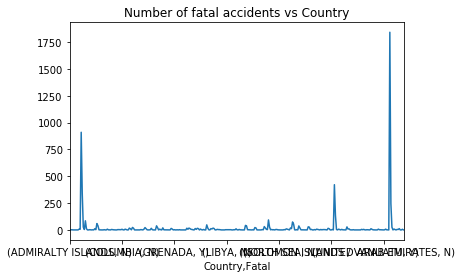

In [15]:
import numpy as np
import matplotlib.pyplot as plt

"""
chartDangerousZones = pd.Series('Area') # generate a pandas series
.plot(kind='hist', title='Weird nerd things that can be done with Pandas') # hist computes distribution
plt.show()   
"""

#df.groupby('Country')['Fatal'].value_counts().plot(kind='hist',title='Weird nerd things that can be done with Pandas')

df.groupby('Country')['Fatal'].value_counts().plot(x='Country', y='Fatal', title='Number of fatal accidents vs Country')
plt.show()
